# Simple Linear Regression. Minimal example

## Import the relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Generate random input data to train on

In [2]:
observations = 1000
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))
inputs = np.column_stack((xs,zs))

print(inputs.shape)

(1000, 2)


## Create the targets we will aim at

In [3]:
noise = np.random.uniform(-1,1,(observations,1))

targets = 2*xs - 3*zs + 5 + noise
print(targets.shape)

(1000, 1)


## Plot the training data

The point is to see that there is a strong trendt hat our model should learn to reproduce

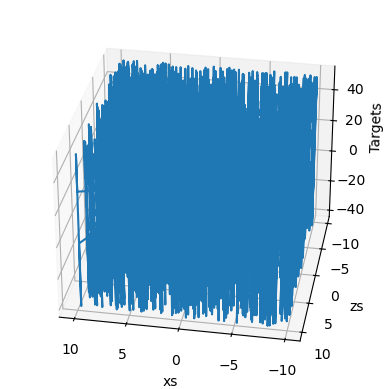

In [4]:
targets = targets.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs, zs, targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations,1)

## Initialize variables

In [5]:
init_range = 0.1 
weights = np.random.uniform(-init_range,init_range, size=(2,1))
biases = np.random.uniform(-init_range,init_range,size=1)

In [6]:
print(weights)
print(biases)

[[-0.00336748]
 [-0.05239194]]
[-0.03287666]


## Set a learning rate

In [8]:
learning_rate = 0.02

## Train the model

In [9]:
for i in range (100):
    outputs = np.dot(inputs,weights) + biases
    deltas = outputs - targets
    loss = np.sum(deltas**2) / 2 / observations
    print(loss)

    deltas_scaled = deltas / observations
    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)

233.34135680291314
33.45753153622989
13.907777128997688
11.620420622620127
11.001039603265344
10.557154482809972
10.145280703550903
9.751072276578057
9.372576533980581
9.009051995238682
8.659895388795555
8.324537765678349
8.00243367375773
7.6930593155248355
7.395911603795351
7.110507334608243
6.8363824005843705
6.573091036135228
6.32020509257679
6.077313341898829
5.844020808050361
5.619948124653236
5.40473091809916
5.198019215027131
4.999476873217659
4.8087810349783835
4.625621602132178
4.449700731754033
4.280732351836684
4.1184416960974035
3.9625648571694976
3.8128483574519194
3.669048736919123
3.530932157220945
3.398274021428626
3.270858608808722
3.1484787240309307
3.03093536023943
2.918037375439823
2.809601181675441
2.7054504464875846
2.605415806174208
2.509334590380807
2.4170505575755796
2.3284136409788108
2.2432797045332236
2.161510308518543
2.0829724844290993
2.0075385187483783
1.9350857452689452
1.8654963456199807
1.7986571576780859
1.7344594915498006
1.672798952826596
1.6135752

## Print weights and biases and see if we have worked correctly.

In [10]:
print(weights,biases)

[[ 1.99408855]
 [-3.00447185]] [4.34736764]


## Plot last outputs vs targets

Since they are the last ones at the end of the training they represent the final model accuracy.

The closer this plot is to a 45 degree line, the closer target and output values are.

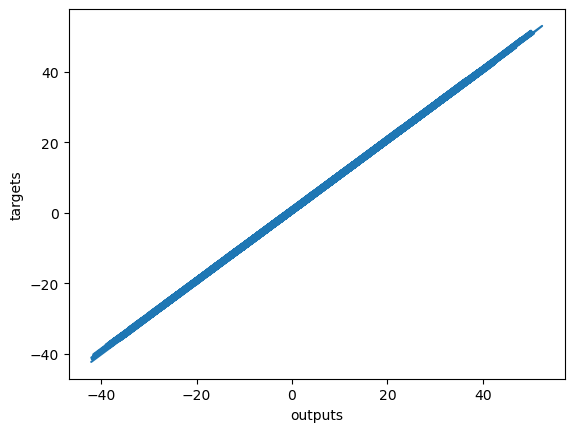

In [12]:
plt.plot(outputs, targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()